In [1]:
using LinearAlgebra
using Statistics

function hyperball_volume(dim, n)
    # generate n random points in the hypercube [0,1]^d
    X = rand(n, dim)
    # count how many points are inside the hyperball of radius 1
    N = sum([sum(X[i,:].^2) <= 1 for i in 1:n])
    # estimate the volume as the proportion of points inside the hyperball
    vol = 2^dim* N / n
    # estimate the standard deviation using the unbiased formula
    σ = 2^dim * std([sum(X[i,:].^2) <= 1 for i in 1:n])/√(n)
    return vol, σ
end

# special thanks to Eric's help to organize syntax

hyperball_volume (generic function with 1 method)

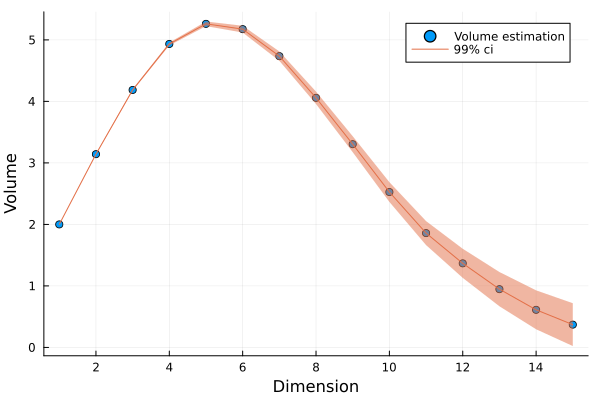

In [6]:
using Plots
using LinearAlgebra
using Statistics

dims = 1:15
n = 10^7
vols = zeros(length(dims))
errs = zeros(length(dims))

for (i, dim) in enumerate(dims)
    vol, err = hyperball_volume(dim, n)
    vols[i] = vol
    errs[i] = err
end

conf_int = errs / sqrt(0.01) # 99% confidence interval

plot(scatter(dims, vols, label="Volume estimation"))
plot!(dims, vols, ribbon=conf_int, xlabel="Dimension", ylabel="Volume", label="99% ci")
